In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/data_clean.csv')

In [3]:
# train test split, 80:20
from sklearn.model_selection import train_test_split
X = df.iloc[:, df.columns != "loan_repaid"]
y = df["loan_repaid"]

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=44)

In [4]:
# Normalize Data

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [5]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
test_acc_list = [] #test accuracies
train_acc_list = [] #train accuracies

def train_and_test_classifier(classifier, X_train, y_train, y_test, verbose=False):  
    """
    fits a classifier to the provided training data, prints out and returns the prediction 
    accuracy on both training and test sets.
    
    """
    # train features, train target
    classifier.fit(X_train, y_train)
    y_pred= classifier.predict(X_test)

    # Summary of the prediction
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))

    # Accuracy
    train_acc = accuracy_score(classifier.predict(X_train),y_train)
    test_acc = accuracy_score(y_pred,y_test)
    print("Train Accuracy of the model is: ", train_acc)
    print("Test Accuracy of the model is: ", test_acc)

    
    return train_acc, test_acc

In [6]:
# RF classifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

res = train_and_test_classifier(rf,X_train, y_train, y_test, verbose=False)
print(res)

train_acc_list.append(res[0])
test_acc_list.append(res[1])

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10171
           1       0.50      0.00      0.00      1694

    accuracy                           0.86     11865
   macro avg       0.68      0.50      0.46     11865
weighted avg       0.81      0.86      0.79     11865

[[10168     3]
 [ 1691     3]]
Train Accuracy of the model is:  1.0
Test Accuracy of the model is:  0.8572271386430679
(1.0, 0.8572271386430679)


In [7]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression
log= LogisticRegression()

res = train_and_test_classifier(log,X_train, y_train, y_test, verbose=False)
print(res)

train_acc_list.append(res[0])
test_acc_list.append(res[1])

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10171
           1       0.16      0.00      0.00      1694

    accuracy                           0.86     11865
   macro avg       0.51      0.50      0.46     11865
weighted avg       0.76      0.86      0.79     11865

[[10155    16]
 [ 1691     3]]
Train Accuracy of the model is:  0.8552013316757623
Test Accuracy of the model is:  0.8561314791403287
(0.8552013316757623, 0.8561314791403287)


/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
from sklearn import svm
# this takes longer than the others to run
clf = svm.SVC(kernel='linear')
res = train_and_test_classifier(clf,X_train, y_train, y_test, verbose=False)
print(res)

train_acc_list.append(res[0])
test_acc_list.append(res[1])

/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10171
           1       0.00      0.00      0.00      1694

    accuracy                           0.86     11865
   macro avg       0.43      0.50      0.46     11865
weighted avg       0.73      0.86      0.79     11865

[[10171     0]
 [ 1694     0]]
Train Accuracy of the model is:  0.8553066857708759
Test Accuracy of the model is:  0.8572271386430679
(0.8553066857708759, 0.8572271386430679)


In [9]:
from sklearn.naive_bayes import ComplementNB
# ComplementNB is better for data with high class imbalance
nb = ComplementNB()
res = train_and_test_classifier(nb,X_train, y_train, y_test, verbose=False)
print(res)

train_acc_list.append(res[0])
test_acc_list.append(res[1])

              precision    recall  f1-score   support

           0       0.88      0.58      0.70     10171
           1       0.18      0.54      0.27      1694

    accuracy                           0.58     11865
   macro avg       0.53      0.56      0.49     11865
weighted avg       0.78      0.58      0.64     11865

[[5944 4227]
 [ 776  918]]
Train Accuracy of the model is:  0.5785836195452917
Test Accuracy of the model is:  0.5783396544458491
(0.5785836195452917, 0.5783396544458491)


In [10]:
# git clone --recursive https://github.com/dmlc/xgboost
# cd xgboost
# cp make/minimum.mk ./config.mk
# make -j4
# cd python-package
# sudo python setup.py install
# TODO: install XGBoost

# from xgboost import XGBClassifier

# xgb = XGBClassifier(use_label_encoder=False)

# res = train_and_test_classifier(xgb,X_train, y_train, y_test, verbose=False)
# print(res)

# train_acc_list.append(res[0])
# test_acc_list.append(res[1])

# TODO: try Neural Nets

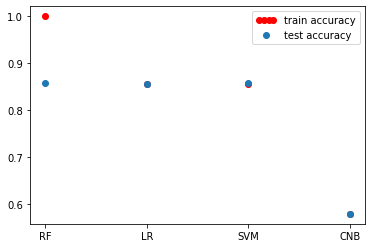

In [11]:
# Plots
from matplotlib.legend_handler import HandlerLine2D
class_model = [1,2,3,4]

my_xticks = ['RF','LR', 'SVM','CNB']

plt.xticks(class_model, my_xticks)
plot1, = plt.plot(class_model, train_acc_list, 'ro', label='train accuracy')
plot2, = plt.plot(class_model, test_acc_list, 'o', label='test accuracy')


plt.legend(handler_map={plot1: HandlerLine2D(numpoints=4)})
plt.show()

/Users/jessicayang/Workspace/lendingclub-ml/lending_venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


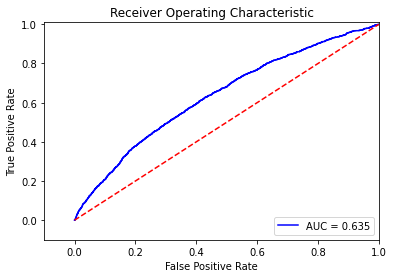

In [12]:
# further analysis for the best performer
from sklearn.metrics import roc_curve, auc 
tmp = log.fit(X_train, y_train.ravel())
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.22183071185150088


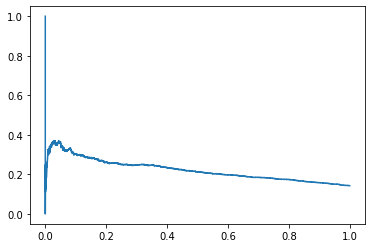

In [13]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_sample_score)

prc_auc = auc(recall, precision)
print(prc_auc)
# Plot PRC
plt.plot(recall, precision)
plt.show()